In [17]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

# Load the dataset
file_path = "C:/Users/H/Downloads/Mall_Customers.csv"
data = pd.read_csv(file_path)

# Display the first 5 rows of the data to explore it
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [18]:
# Display summary statistics of the data
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [19]:
# Display information about the dataset, such as data types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [20]:
# Convert categorical values (Gender) to numerical values
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

# Verify the conversion
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1       0   19                  15                      39
1           2       0   21                  15                      81
2           3       1   20                  16                       6
3           4       1   23                  16                      77
4           5       1   31                  17                      40


C:\Users\H\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\H\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


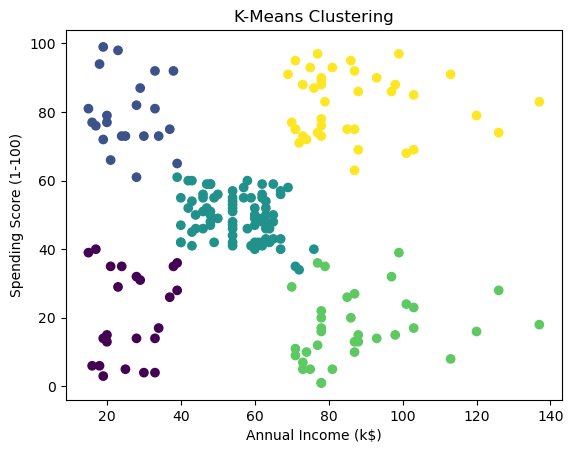

In [21]:
# Define the number of clusters for K-Means
k = 5
kmeans = KMeans(n_clusters=k)

# Select the features used for clustering
features = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Apply the K-Means model
kmeans.fit(features)
data['KMeans_Cluster'] = kmeans.labels_

# Plot the K-Means clustering results
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['KMeans_Cluster'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering')
plt.show()

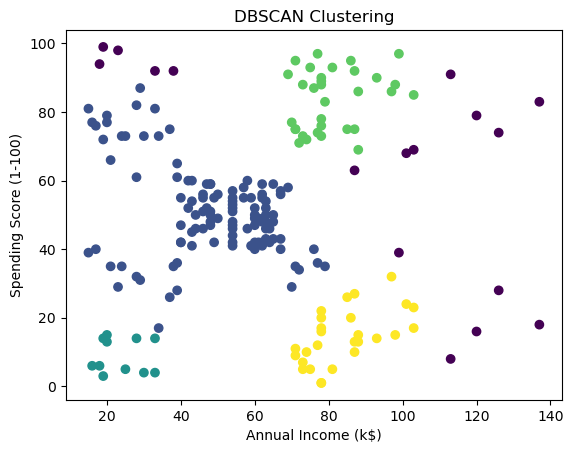

In [22]:
from sklearn.cluster import DBSCAN

# Define the DBSCAN model
dbscan = DBSCAN(eps=10, min_samples=5)

# Apply the DBSCAN model
data['DBSCAN_Cluster'] = dbscan.fit_predict(features)

# Plot the DBSCAN clustering results
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['DBSCAN_Cluster'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('DBSCAN Clustering')
plt.show()

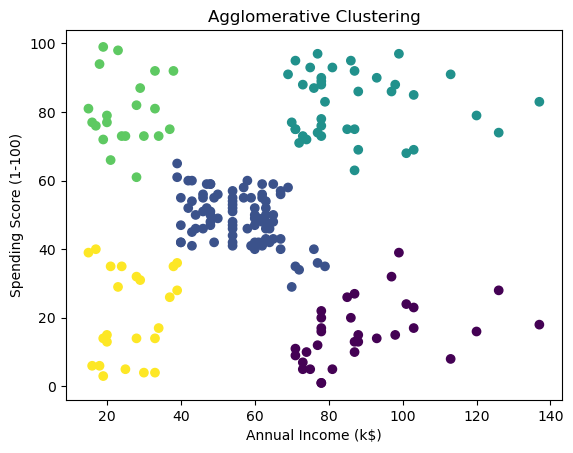

In [23]:
# Define the Agglomerative Clustering model with the same number of clusters as K-Means
agg_clustering = AgglomerativeClustering(n_clusters=k)

# Apply the Agglomerative Clustering model
data['Agglomerative_Cluster'] = agg_clustering.fit_predict(features)

# Plot the Agglomerative Clustering results
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Agglomerative_Cluster'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Agglomerative Clustering')
plt.show()

In [24]:
# Evaluate the K-Means clustering using the Silhouette Score
kmeans_silhouette = silhouette_score(features, data['KMeans_Cluster'])
print(f'K-Means Silhouette Score: {kmeans_silhouette}')

# Evaluate the DBSCAN clustering using the Silhouette Score
dbscan_silhouette = silhouette_score(features, data['DBSCAN_Cluster'])
print(f'DBSCAN Silhouette Score: {dbscan_silhouette}')

# Evaluate the Agglomerative Clustering using the Silhouette Score
agg_silhouette = silhouette_score(features, data['Agglomerative_Cluster'])
print(f'Agglomerative Clustering Silhouette Score: {agg_silhouette}')

K-Means Silhouette Score: 0.553931997444648
DBSCAN Silhouette Score: 0.41249187303464097
Agglomerative Clustering Silhouette Score: 0.5529945955148897


In [25]:
# Display some statistics for each cluster and interpret them for each model
for model in ['KMeans_Cluster', 'DBSCAN_Cluster', 'Agglomerative_Cluster']:
    print(f'\nStatistics and Interpretation for {model}:')
    group_stats = data.groupby(model).mean()
    print(group_stats)
    
    for cluster in group_stats.index:
        print(f"\nCluster {cluster} interpretation:")
        cluster_data = group_stats.loc[cluster]
        print(f"Average Annual Income: {cluster_data['Annual Income (k$)']}")
        print(f"Average Spending Score: {cluster_data['Spending Score (1-100)']}")
        print(f"Average Gender (0=Male, 1=Female): {cluster_data['Gender']}")


Statistics and Interpretation for KMeans_Cluster:
                CustomerID    Gender        Age  Annual Income (k$)  \
KMeans_Cluster                                                        
0                23.000000  0.608696  45.217391           26.304348   
1                23.090909  0.590909  25.272727           25.727273   
2                86.320988  0.592593  42.716049           55.296296   
3               164.371429  0.457143  41.114286           88.200000   
4               162.000000  0.538462  32.692308           86.538462   

                Spending Score (1-100)  DBSCAN_Cluster  Agglomerative_Cluster  
KMeans_Cluster                                                                 
0                            20.913043        0.478261               4.000000  
1                            79.363636       -0.227273               2.909091  
2                            49.518519        0.000000               1.000000  
3                            17.114286        2.171